In [21]:
pprint("--- Jai Shree Ganesha ---")

'--- Jai Shree Ganesha ---'


<font color="red">Loading necessary configuarations</font>


In [12]:
from transformers import LlavaNextProcessor, LlavaForConditionalGeneration, BitsAndBytesConfig, LlavaNextForConditionalGeneration, AutoProcessor
from PIL import Image
import torch
import requests
from PIL import Image
from pprint import pprint

In [3]:
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
quantized=True
if quantized:
  print("=======================")
  print("Loading Quantized version")
  print("=======================")
  quantization_config=BitsAndBytesConfig(
      load_in_4bit=True,
      bnb_4bit_compute_dtype=torch.float16,
      bnb_4bit_quant_type="nf4"
  )
  model=LlavaForConditionalGeneration.from_pretrained(
      "llava-hf/llava-v1.6-mistral-7b-hf",
      quantization_config=quantization_config,
      device_map="auto"
  )
else:
  print("=======================")
  print("Loading Non-Quantized version i.e full version")
  print("=======================")
  model=LlavaForConditionalGeneration.from_pretrained(
      "llava-hf/llava-v1.6-mistral-7b-hf",
      device_map="auto"
  )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading Quantized version


You are using a model of type llava_next to instantiate a model of type llava. This is not supported for all configurations of models and can yield errors.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

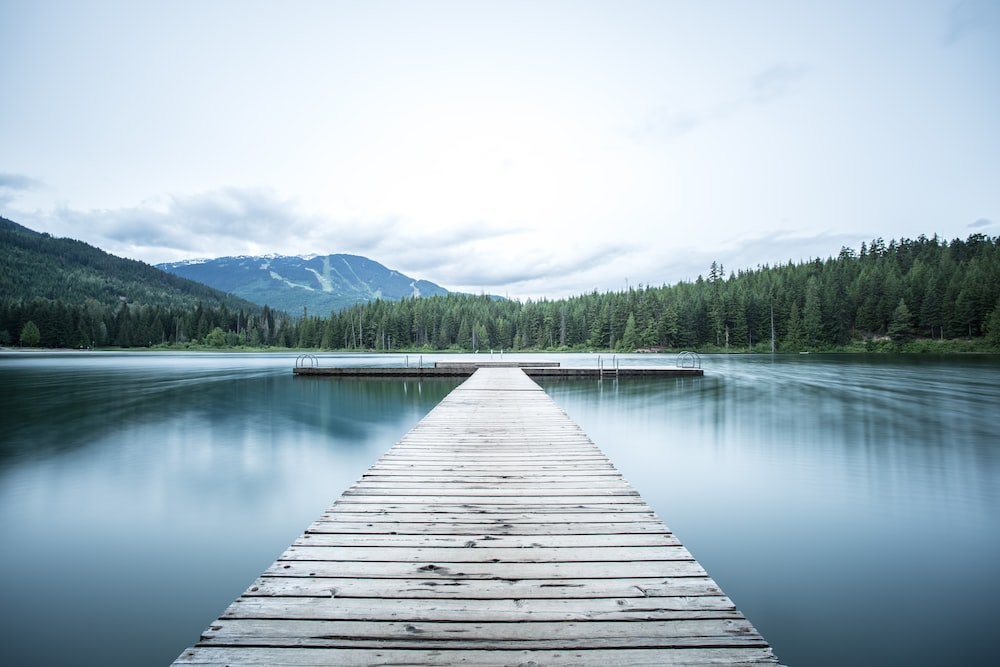

In [4]:
url="https://llava-vl.github.io/static/images/view.jpg"
image=Image.open(requests.get(url,stream=True).raw)
image

In [6]:
prompt= "What prcautions should we take while visiting this place?"
max_output_token=800
prompt=f"[INST] <image>\n{prompt} [/INST]"
# Prepare the prompt and image inputs using the processor
inputs = processor(prompt,image, return_tensors="pt").to("cuda:0")
if "image_sizes" in inputs:
    del inputs["image_sizes"]
inputs["pixel_values"] = inputs["pixel_values"][:, 0, :, :, :]
output = model.generate(**inputs, max_new_tokens=max_output_token)

# Decode the generated output
response = processor.decode(output[0], skip_special_tokens=True)

# Print the response
pprint(response)


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


('[INST]  \n'
 'What prcautions should we take while visiting this place? [/INST] When '
 'visiting a place like the one shown in the image, which appears to be a dock '
 'or pier leading into a serene lake with mountains in the background, you '
 'should take several precautions to ensure your safety and enjoyment:\n'
 '\n'
 '1. **Check Weather Conditions**: Before heading out, make sure to check the '
 'weather forecast. Sudden changes in weather can make the lake conditions '
 'dangerous, especially if you plan to be on the water.\n'
 '\n'
 '2. **Wear Appropriate Clothing**: Dress in layers and wear waterproof '
 'clothing if you plan to be on the water. Bring a hat and sunscreen to '
 'protect yourself from the sun.\n'
 '\n'
 '3. **Stay Hydrated**: Bring plenty of water to stay hydrated, especially if '
 "you're going to be active or it's a hot day.\n"
 '\n'
 '4. **Be Aware of Your Surroundings**: Keep an eye on the water and be aware '
 'of any potential hazards, such as strong cu

In [7]:
prompt= "Who is god Shiva?"
max_output_token=800
image=None
prompt=f"[INST] <image>\n{prompt} [/INST]"

# Prepare the prompt and image inputs using the processor
# The issue was that the processor was adding extra dimensions
# which were not compatible with the model's conv2d layer
# By using image=image in the processor call, we ensure
# the image is processed correctly and passed with the correct dimensions
inputs = processor(prompt,image, return_tensors="pt").to("cuda")
output = model.generate(**inputs, max_new_tokens=max_output_token)

# Decode the generated output
response = processor.decode(output[0], skip_special_tokens=True)

# Print the response
pprint(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


('[INST]  \n'
 'Who is god Shiva? [/INST] God Shiva is one of the principal deities in '
 'Hinduism. He is the destroyer and transformer within the Trimurti, the three '
 'main forms of God in Hinduism, which include Brahma and Vishnu. Shiva is '
 'also known as the destroyer and transformer of all things, and is often '
 'depicted as a ascetic or a yogi. He is the god of destruction and change, '
 'and is also revered as the god of fertility and regeneration. ')


In [8]:
from datasets import load_dataset
dataset=load_dataset("naver-clova-ix/cord-v2", split="validation")

README.md:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

(…)-00000-of-00004-b4aaeceff1d90ecb.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00001-of-00004-7dbbe248962764c5.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

(…)-00002-of-00004-688fe1305a55e5cc.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

(…)-00003-of-00004-2d0cd200555ed7fd.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

(…)-00000-of-00001-cc3c5779fe22e8ca.parquet:   0%|          | 0.00/242M [00:00<?, ?B/s]

(…)-00000-of-00001-9c204eb3f4e11791.parquet:   0%|          | 0.00/234M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/800 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

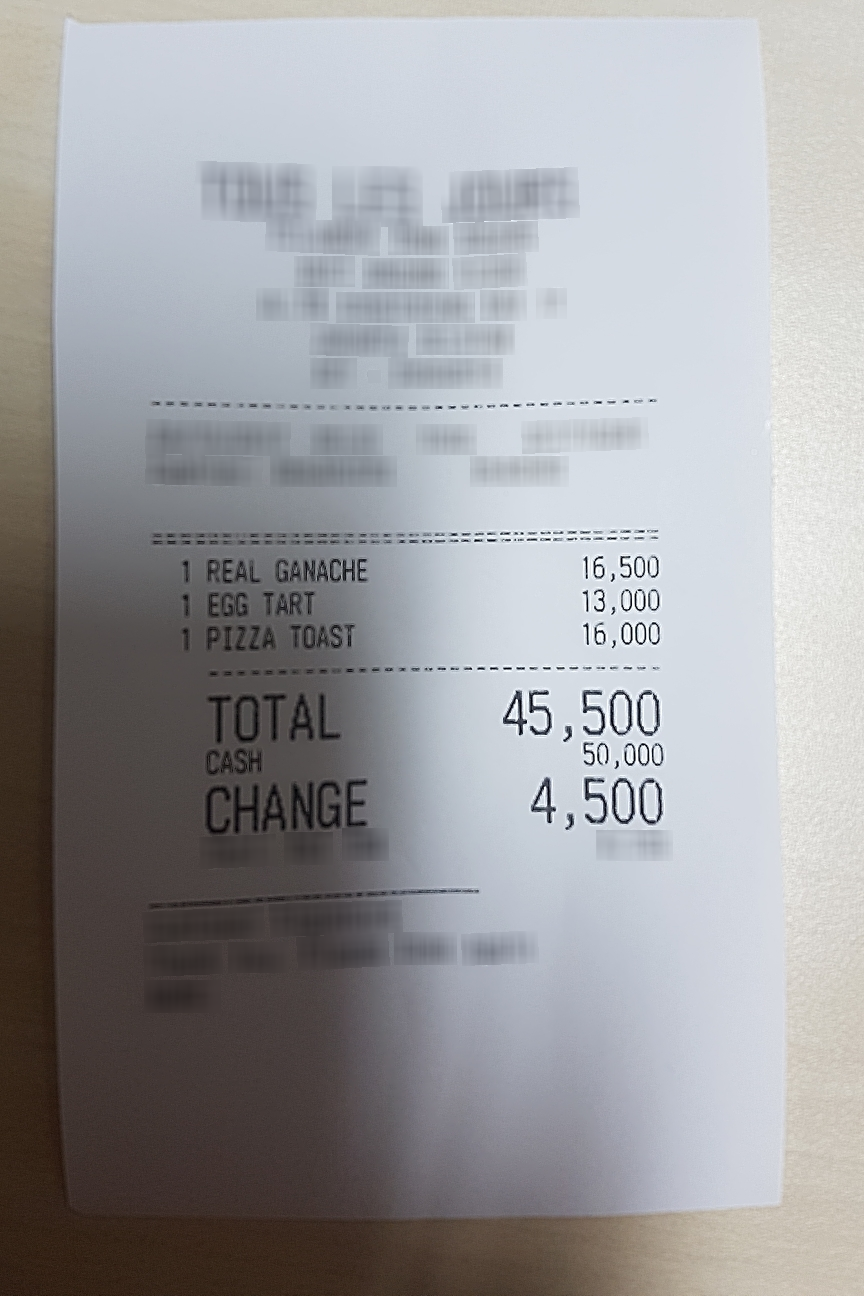

In [9]:
image=dataset[0]["image"]
image

In [11]:
prompt=f"[INST] <image>\nExtract JSON [\INST]"
max_output_token=200
inputs=processor(prompt,image,return_tensors="pt").to("cuda:0")
if "image_sizes" in inputs:
    del inputs["image_sizes"]
inputs["pixel_values"] = inputs["pixel_values"][:, 0, :, :, :]
output=model.generate(**inputs,max_new_tokens=max_output_token)
response=processor.decode(output[0],skip_special_tokens=True)
pprint(response)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


('[INST]  \n'
 "Extract JSON [\\INST] The image you've provided appears to be a receipt from "
 'a restaurant. However, due to the quality of the image and the angle at '
 "which it was taken, it's difficult to read the text on the receipt. If you "
 "can provide a clearer image or type out the text, I'd be happy to help you "
 'extract the information into JSON format. ')


<font color="red">Llava 7 billion parameter model without finetuning is not able to output the content of the image in JSON format.</font>
